In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("auto-mpg.csv")

In [10]:
df.replace('?', np.nan , inplace=True)
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
# Handling missing values
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include="object").columns

In [14]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [15]:
# Converting object columns to numerical using OneHotEncoder
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(df[categorical_cols]).toarray()

In [16]:
feature_names = encoder.get_feature_names_out(categorical_cols)

In [17]:
df = pd.concat([df[numerical_cols], pd.DataFrame(encoded_cols, columns=feature_names)], axis=1)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,3693,11.5,70,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,3436,11.0,70,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,3433,12.0,70,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,3449,10.5,70,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Splitting the data
x = df.drop("mpg", axis=1)
y = df["mpg"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
#Create a StandardScaler Instance
scaler = StandardScaler()

In [21]:
#Fit the Scaler to the Training Data
scaler.fit(x_train)

StandardScaler()

In [22]:
#Scale the Training Data
x_train_scaled = scaler.transform(x_train)
#Scale the Test Data
x_test_scaled = scaler.transform(x_test)

In [23]:
print("x_train_scaled:\n", x_train_scaled)
print("\nx_test_scaled:\n", x_test_scaled)

x_train_scaled:
 [[ 1.52718818  1.0901965   0.55282624 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [-0.85051483 -0.92299623 -0.99966729 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [-0.85051483 -0.98134964 -1.1247723  ... -0.07955573 -0.0561656
  -0.0561656 ]
 ...
 [-0.85051483 -0.56315019 -0.54094894 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [-0.85051483 -1.00080078 -1.09498539 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [-0.85051483 -0.92299623 -1.21413301 ... -0.07955573 -0.0561656
  -0.0561656 ]]

x_test_scaled:
 [[-0.85051483 -0.98134964 -1.39881183 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [-0.85051483 -0.69930815 -0.40988656 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [ 0.33833667  0.38995555 -0.39916327 ... -0.07955573 -0.0561656
  -0.0561656 ]
 ...
 [-0.85051483 -0.7771127  -0.43371608 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [-0.85051483 -0.99107521 -1.22962221 ... -0.07955573 -0.0561656
  -0.0561656 ]
 [ 1.52718818  1.09992206  1.03775706 ... -0.07955573 -0.0561656
  -0.05616

In [24]:
# Linear Regression and prediction
model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

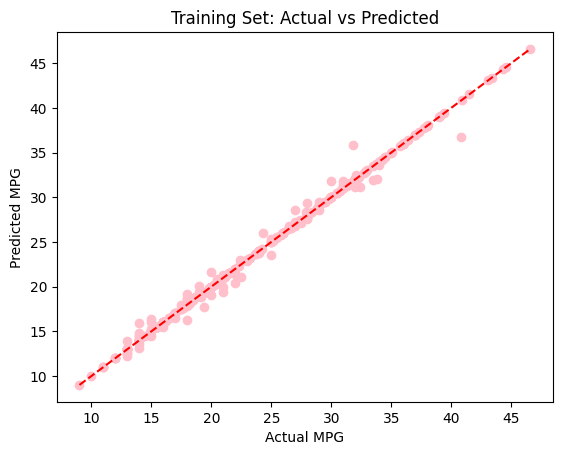

In [25]:
# Visualization Training
plt.scatter(y_train, y_train_pred, color='pink')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

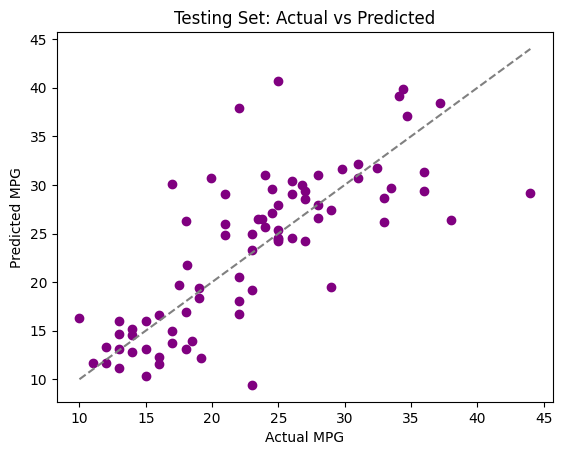

In [26]:
#Visualization Testing
plt.scatter(y_test, y_test_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()